<a href="https://colab.research.google.com/github/ly0wenka/aiGoogleColab/blob/main/Lecture_8_en.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lecture 8

Let's explore <a href='https://www.kaggle.com/datasets/datamunge/sign-language-mnist'>Sign Language MNIST dataset</a> , which contains 28x28 images of hands
depicting the 26 letters of the english alphabet.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
file_name = 'train.csv'
images = []
df = pd.read_csv(file_name)
df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,13,189,189,190,190,192,193,193,193,193,...,132,165,99,77,52,200,234,200,222,225
27451,23,151,154,157,158,160,161,163,164,166,...,198,198,198,198,198,196,195,195,195,194
27452,18,174,174,174,174,174,175,175,174,173,...,121,196,209,208,206,204,203,202,200,200
27453,17,177,181,184,185,187,189,190,191,191,...,119,56,27,58,102,79,47,64,87,93


In [ ]:
labels

array([ 3,  6,  2, ..., 18, 17, 23], dtype=int64)

In [ ]:
import string

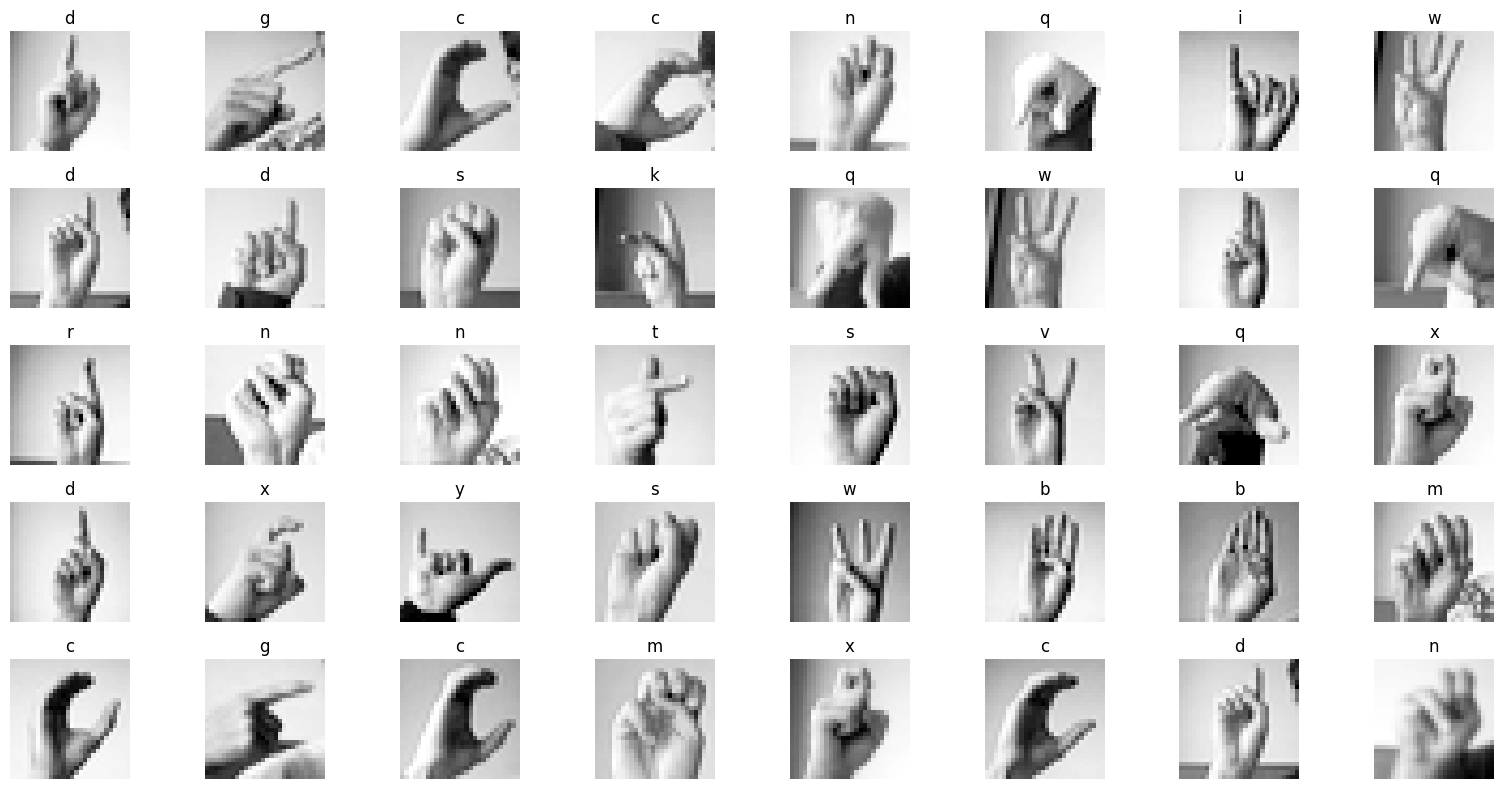

In [ ]:
def plot_categories(training_images, training_labels):
    fig, axes = plt.subplots(5, 8, figsize=(16, 8))
    axes = axes.flatten()
    letters = list(string.ascii_lowercase)

    for k in range(40):
        img = training_images[k]
#         img = np.expand_dims(img, axis=-1)
#         img = array_to_img(img)
        ax = axes[k]
        ax.imshow(img, cmap="Greys_r")
        ax.set_title(f"{letters[int(training_labels[k])]}")
        # ax.set_title(f"{chr(int(training_labels[k])+97)}")
        ax.set_axis_off()

    plt.tight_layout()
    plt.show()

plot_categories(images, labels)

## The (Py)Tesseract Library

OCR - Optical Character Recognition

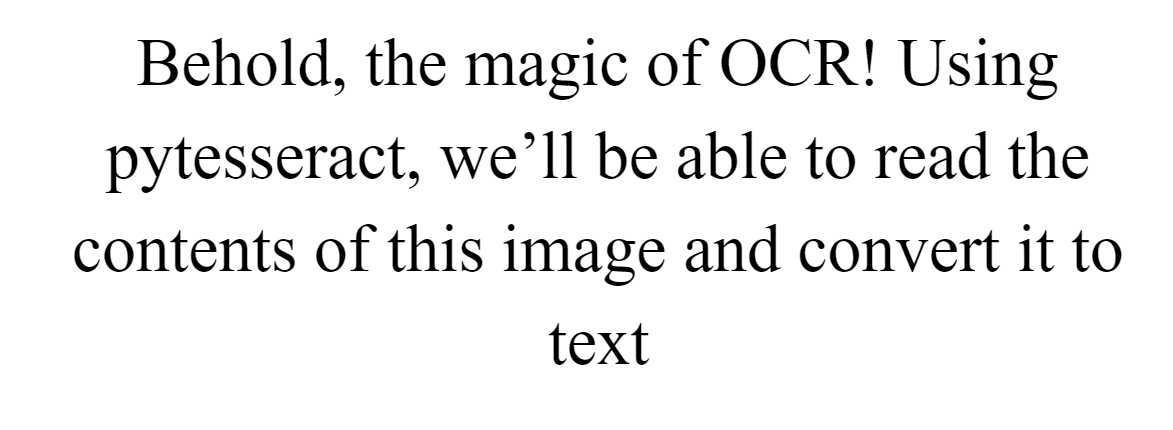

In [ ]:
# We're going to start experimenting with tesseract using just a simple image of nice clean text.
# Lets first import Image from PIL and display the image text.png.
from PIL import Image

image = Image.open("images/text.png")
display(image)

https://nanonets.com/blog/ocr-with-tesseract/

https://pypi.org/project/pytesseract/

1 - You need to have Tesseract OCR installed on your computer.

get it from here. https://github.com/UB-Mannheim/tesseract/wiki

Download the suitable version.

2 - Add Tesseract path to your System Environment. i.e. Edit system variables.

3 - Run `pip install pytesseract` and `pip install tesseract`

4 - Add this line to your python script every time

```Python
pytesseract.pytesseract.tesseract_cmd = 'C:\Program Files\Tesseract-OCR\tesseract.exe'  # your path may be different
```
5 - Run the code.

In [ ]:
pip list

Package                           Version
--------------------------------- -----------
altgraph                          0.17.3
argon2-cffi                       20.1.0
astroid                           2.12.12
asttokens                         2.2.1
attrs                             20.1.0
backcall                          0.2.0
beautifulsoup4                    4.11.2
black                             23.1.0
bleach                            3.1.5
branca                            0.6.0
certifi                           2020.6.20
cffi                              1.14.2
chardet                           4.0.0
click                             8.1.3
colorama                          0.4.6
comm                              0.1.2
cycler                            0.10.0
debugpy                           1.6.6
decorator                         5.1.1
defusedxml                        0.6.0
dill                              0.3.5.1
dnspython                         2.1.0
dominate         


[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
#this is not enough
!pip install pytesseract

In [ ]:
pip install tesseract

In [ ]:
import pytesseract
dir(pytesseract)

['ALTONotSupported',
 'Output',
 'TSVNotSupported',
 'TesseractError',
 'TesseractNotFoundError',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'get_languages',
 'get_tesseract_version',
 'image_to_alto_xml',
 'image_to_boxes',
 'image_to_data',
 'image_to_osd',
 'image_to_pdf_or_hocr',
 'image_to_string',
 'pytesseract',
 'run_and_get_output']

In [ ]:
help(pytesseract.image_to_string)

Help on function image_to_string in module pytesseract.pytesseract:

image_to_string(image, lang=None, config='', nice=0, output_type='string', timeout=0)
    Returns the result of a Tesseract OCR run on the provided image to string



In [ ]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
text = pytesseract.image_to_string(image)
print(text)

Behold, the magic of OCR! Using
pytesseract, we’ll be able to read the
contents of this image and convert it to
text



In [ ]:
text

'Behold, the magic of OCR! Using\npytesseract, we’ll be able to read the\ncontents of this image and convert it to\ntext\n'

In [ ]:
print(pytesseract.image_to_boxes(image))

B 138 345 178 390 0
e 184 344 209 377 0
h 199 334 229 392 0
o 212 345 244 392 0
l 247 344 276 377 0
d 281 344 331 392 0
, 335 334 344 352 0
t 366 344 383 386 0
h 384 345 417 392 0
e 420 344 445 377 0
m 465 345 517 377 0
a 519 344 547 377 0
g 549 330 580 377 0
i 583 345 598 392 0
c 602 344 627 377 0
o 648 344 678 377 0
f 683 345 709 392 0
O 721 344 765 391 0
C 770 344 810 391 0
R 814 345 859 390 0
! 866 344 873 391 0
U 898 344 946 390 0
s 949 344 970 377 0
i 975 345 989 392 0
n 992 345 1025 377 0
g 1027 330 1058 377 0
p 106 237 137 284 0
y 140 237 173 283 0
t 174 251 192 293 0
e 195 251 220 284 0
s 225 251 246 284 0
s 252 251 272 284 0
e 277 251 303 284 0
r 305 252 327 284 0
a 330 251 357 284 0
c 346 237 371 293 0
t 359 251 405 293 0
, 409 241 419 259 0
w 440 251 488 283 0
e 491 251 516 284 0
’ 504 251 528 299 0
l 525 252 558 299 0
l 562 252 577 299 0
b 595 251 627 299 0
e 631 251 657 284 0
a 678 251 705 284 0
b 706 251 737 299 0
l 726 251 750 299 0
e 742 251 786 299 0
t 806 251 823 293

In [ ]:
type(pytesseract.image_to_boxes(image))

str

In [ ]:
pytesseract.image_to_boxes(image)

'B 138 345 178 390 0\ne 184 344 209 377 0\nh 199 334 229 392 0\no 212 345 244 392 0\nl 247 344 276 377 0\nd 281 344 331 392 0\n, 335 334 344 352 0\nt 366 344 383 386 0\nh 384 345 417 392 0\ne 420 344 445 377 0\nm 465 345 517 377 0\na 519 344 547 377 0\ng 549 330 580 377 0\ni 583 345 598 392 0\nc 602 344 627 377 0\no 648 344 678 377 0\nf 683 345 709 392 0\nO 721 344 765 391 0\nC 770 344 810 391 0\nR 814 345 859 390 0\n! 866 344 873 391 0\nU 898 344 946 390 0\ns 949 344 970 377 0\ni 975 345 989 392 0\nn 992 345 1025 377 0\ng 1027 330 1058 377 0\np 106 237 137 284 0\ny 140 237 173 283 0\nt 174 251 192 293 0\ne 195 251 220 284 0\ns 225 251 246 284 0\ns 252 251 272 284 0\ne 277 251 303 284 0\nr 305 252 327 284 0\na 330 251 357 284 0\nc 346 237 371 293 0\nt 359 251 405 293 0\n, 409 241 419 259 0\nw 440 251 488 283 0\ne 491 251 516 284 0\n’ 504 251 528 299 0\nl 525 252 558 299 0\nl 562 252 577 299 0\nb 595 251 627 299 0\ne 631 251 657 284 0\na 678 251 705 284 0\nb 706 251 737 299 0\nl 726 251

In [ ]:
pytesseract.image_to_boxes(image).split('\n')[0].split()

['B', '138', '345', '178', '390', '0']

['138', '345', '178', '390']
[138, 345, 178, 390]


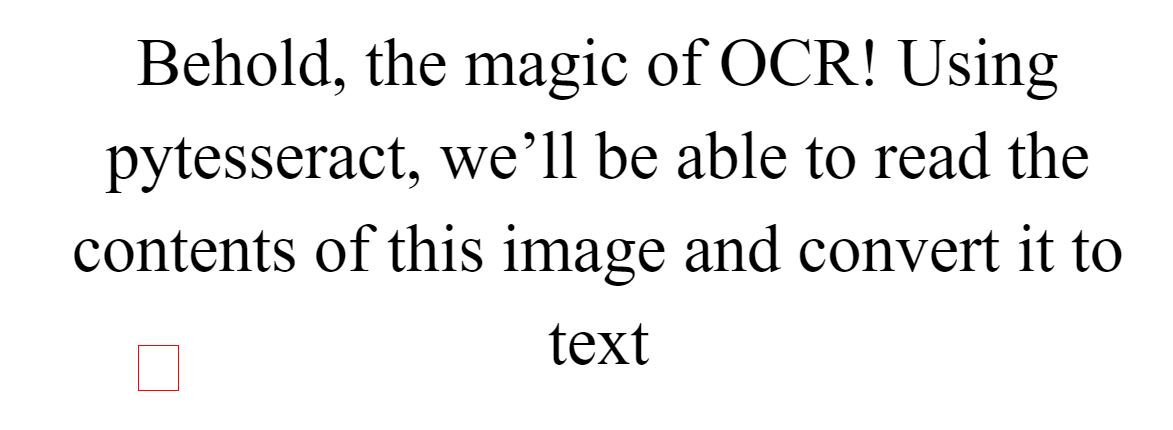

In [ ]:
from PIL import ImageDraw

b = pytesseract.image_to_boxes(image).split('\n')[0].split()[1:-1]
print(b)
b = list(map(int,b))
print(b)

img_draw = image.copy()
drawing_object = ImageDraw.Draw(img_draw)
drawing_object.rectangle((b[0],b[1],b[2],b[3]), outline='red')
img_draw

['138', '345', '178', '390']
[138, 345, 178, 390]
430


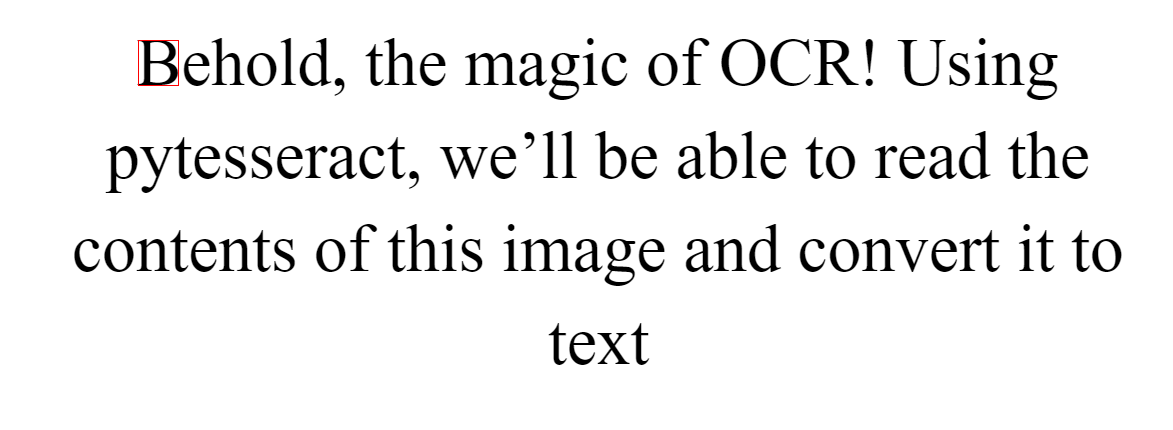

In [ ]:
from PIL import ImageDraw

b = pytesseract.image_to_boxes(image).split('\n')[0].split()[1:-1]
print(b)
b = list(map(int,b))
print(b)
h = image.size[1]
print(h)
img_draw = image.copy()
drawing_object = ImageDraw.Draw(img_draw)
drawing_object.rectangle((b[0],h-b[1],b[2],h-b[3]), outline='red')
img_draw



In [ ]:
h = image.size[1]
img_draw = image.copy()
drawing_object = ImageDraw.Draw(img_draw)
lst = pytesseract.image_to_boxes(image).split('\n')
len(lst)

96

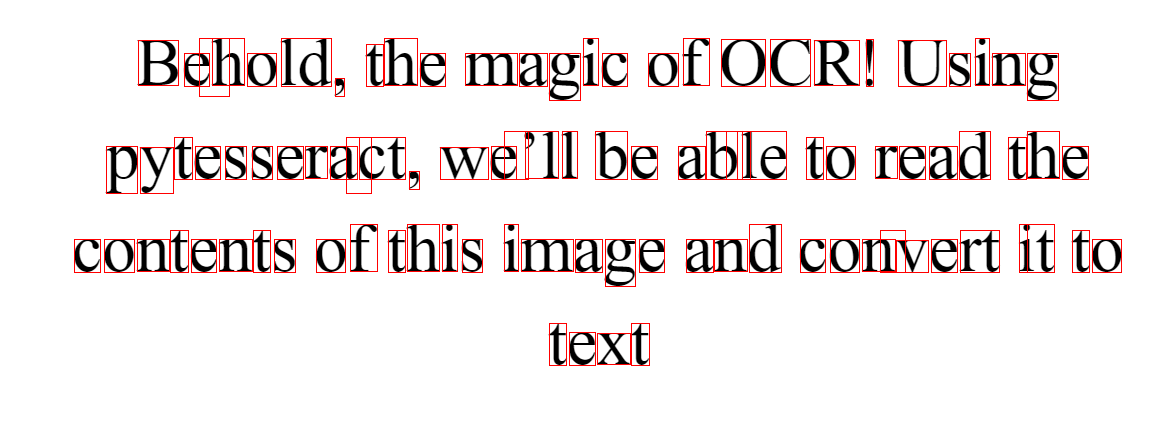

In [ ]:
for i in range(len(lst)-1):
    b = lst[i].split()[1:-1]
    b = list(map(int,b))
    drawing_object.rectangle((b[0],h-b[1],b[2],h-b[3]),fill = None, outline='red')
img_draw

## More Tesseract

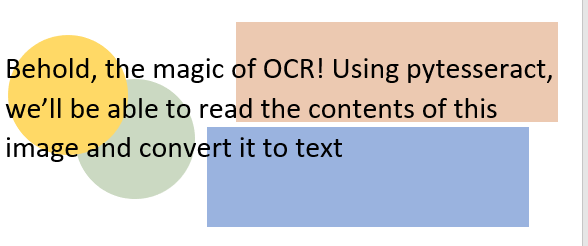

In [ ]:
img = Image.open("images/Noisy_OCR.PNG")
display(img)

In [ ]:
text = pytesseract.image_to_string(Image.open("images/Noisy_OCR.PNG"))
print(text)

e magic of OCR! Using pytesseract,
le to read the contents of this

d convert it to text



In [ ]:
img = Image.open('images/Noisy_OCR.PNG')
img = img.convert('L')
# Now lets save that image
img.save('greyscale_noise.jpg')
# And run OCR on the greyscale image
text = pytesseract.image_to_string(Image.open('greyscale_noise.jpg'))
print(text)

Behold, the magic of OCR! Using pytesseract,
we'll be able to read the contents of this
image and convert it to text



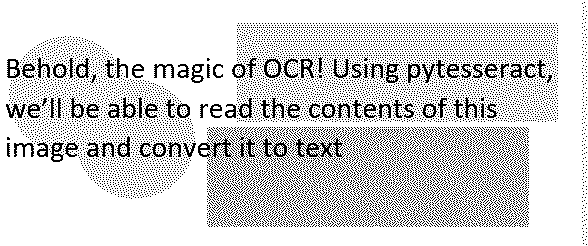

Behold, the magic of OCR! Using pytesseract,
we'll be able to read the contents of this




In [ ]:
img = Image.open('images/Noisy_OCR.PNG').convert('1')
# Now lets save and display that image
img.save('black_white_noise.jpg')
display(img)
text = pytesseract.image_to_string(Image.open('black_white_noise.jpg'))
print(text)

https://www.geeksforgeeks.org/python-pil-image-convert-method
    
https://en.wikipedia.org/wiki/Floyd%E2%80%93Steinberg_dithering
    

Trying with threshold 0


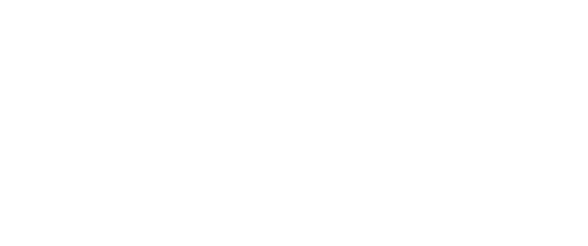


Trying with threshold 64


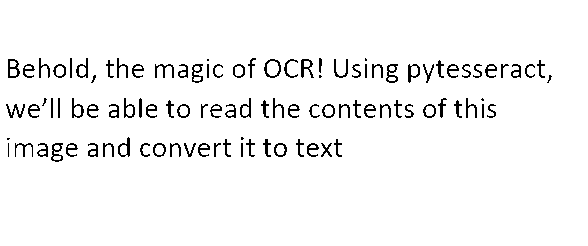

Behold, the magic of OCR! Using pytesseract,
we’ll be able to read the contents of this
image and convert it to text

Trying with threshold 128


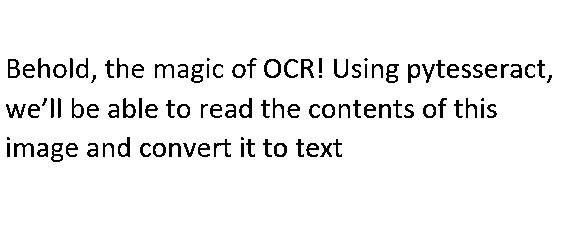

Behold, the magic of OCR! Using pytesseract,
we’ll be able to read the contents of this
image and convert it to text

Trying with threshold 192


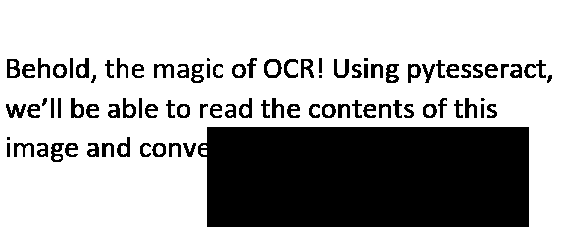

Behold, the magic of OCR! Using pytesseract,
we’ll be able to read the contents of this
image and conv


Trying with threshold 256


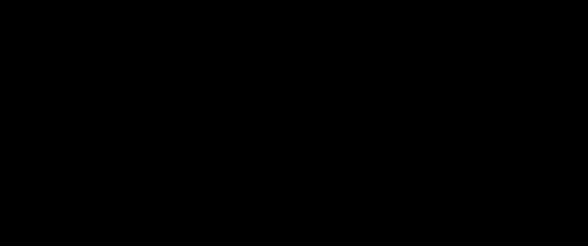

In [ ]:

def binarize(image_to_transform, threshold):

    output_image=image_to_transform.convert("L")
       for x in range(output_image.width):
        for y in range(output_image.height):
            if output_image.getpixel((x,y))< threshold:
                output_image.putpixel( (x,y), 0 )
            else:
                output_image.putpixel( (x,y), 255 )
    return output_image

for thresh in range(0,257,64):
    print("Trying with threshold " + str(thresh))

    display(binarize(Image.open('images/Noisy_OCR.PNG'), thresh))

    print(pytesseract.image_to_string(binarize(Image.open('images/Noisy_OCR.PNG'), thresh)))

## Tesseract and Photographs

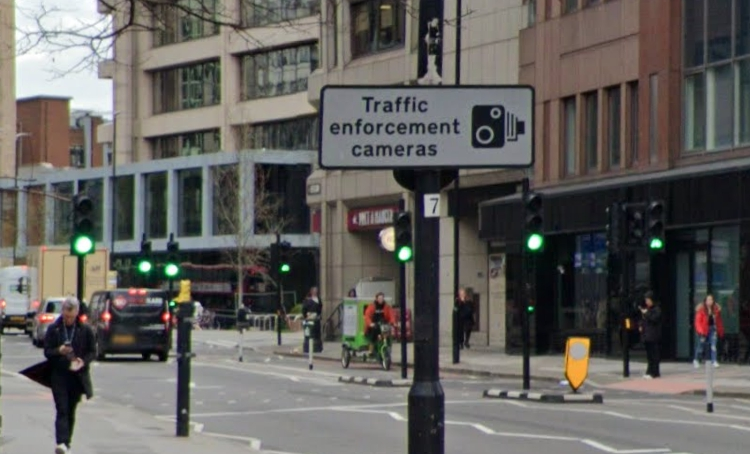

''

In [ ]:
from PIL import Image
import pytesseract

image=Image.open('images/street1.jpg')

display(image)

pytesseract.image_to_string(image)

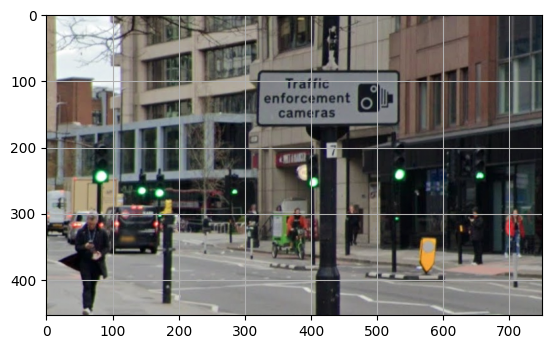

In [ ]:
import matplotlib.pyplot as plt
plt.grid()
plt.imshow(image)

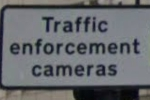

Traffic
enforcement
cameras




In [ ]:
bounding_box=(320, 80, 470, 180)

# Now lets crop the image
title_image=image.crop(bounding_box)

# Now lets display it and pull out the text
display(title_image)
print(pytesseract.image_to_string(title_image))

In [ ]:
# From this we can notice two things. First, when we print out one of the resampling
# values it actually just prints an integer! This is really common: that the
# API developer writes a property, such as Image.BICUBIC, and then assigns it to an
# integer value to pass it around. Some languages use enumerations of values, which is
# common in say, Java, but in python this is a pretty normal way of doing things.
# The second thing we learned is that there are a number of different algorithms for
# image resampling. In this case, the Image.LANCZOS and Image.BICUBIC filters do a good
# job. Lets see if we are able to recognize the text off of this resized image

# First lets resize to the larger size
bigger_sign=little_sign.resize(new_size, Image.BICUBIC)
# Lets print out the text
pytesseract.image_to_string(bigger_sign)

''

In [ ]:
# Well, not perfect, but we see fossil there among other values which are in the dictionary.
# This is not a bad way to clean up OCR data. It can useful to use a language or domain specific
# dictionary in practice, especially if you are generating a search engine for specialized language
# such as a medical knowledge base or locations. And if you scroll up and look at the data
# we were working with - this small little wall hanging on the inside of the store - it's not
# so bad.
#
# At this point you've now learned how to manipulate images and convert them into text. In the
# next module in this course we're going to dig deeper further into a computer vision library
# which allows us to detect faces among other things. Then, on to the culminating project!

Tesseract supports different languages, included Ukranian language
https://tesseract-ocr.github.io/tessdoc/Data-Files-in-different-versions.html

To upload trined datasets go to

https://tesseract-ocr.github.io/tessdoc/Data-Files.html

and download ukr.traineddata for Ukranian language

https://stackoverflow.com/questions/65572698/how-to-configure-pytesseract-to-support-text-detection-for-non-english-language

https://vasylsymonenko.org/poeziya/ty-znayesh-shho-ty-lyudyna/

https://vasylsymonenko.org/perekladene/know-human-anglijskoyu/

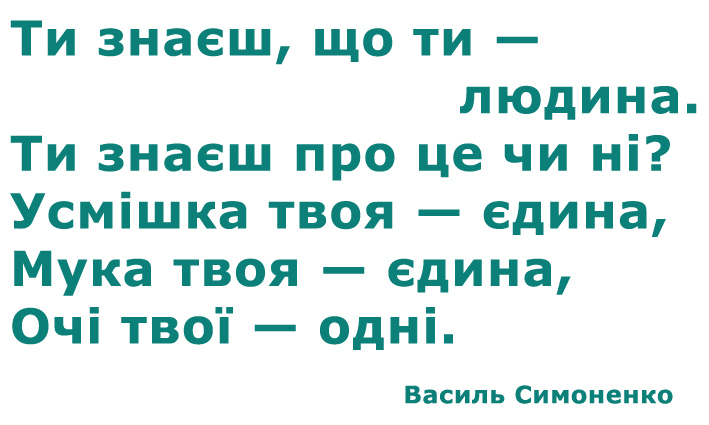

In [ ]:
img = Image.open('images/Symonenko.jpg')
display(img)

text = pytesseract.image_to_string(img, lang='ukr', config='--tessdata-dir .')

In [ ]:
print(text.replace('\n\n','\n'))

Ти знаєш, що ти -
людина.
Ти знаєш про це чи ні?
Усмішка твоя -- єдина,
Мука твоя -- єдина,
Очі твої -- одні.
Василь Симоненко



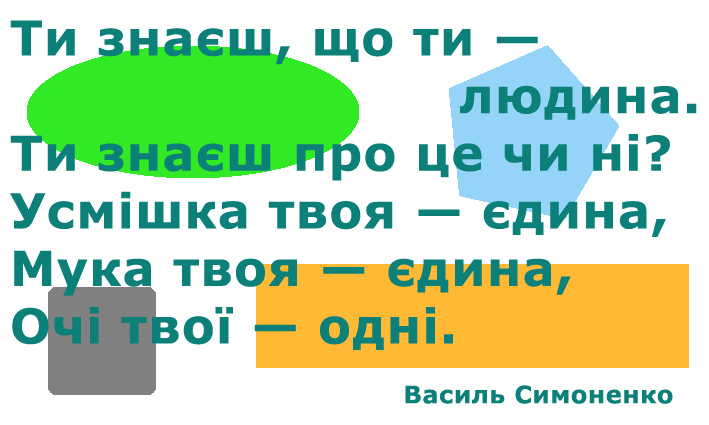

Ти знаєш, що ти --

) людина.
Ти знаєш про це чи ні?
Усмішка твоя -- єдина,

Мука тв
і ос

Василь Симоненко




In [ ]:
img = Image.open('images/Symonenko_noisy.jpg')
display(img)

text = pytesseract.image_to_string(img, lang='ukr', config='--tessdata-dir .')
print(text)

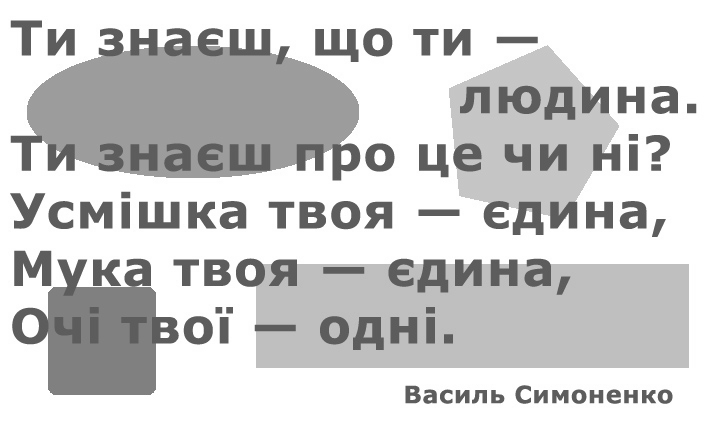

Ти що ти ча

о це чи Ні?
Усмішка твоя -- єдина,
М

ка твоя--- єдина,
ої -- одні.
Василь Симоненко




In [ ]:
gray = img.convert('L')
display(gray)
print(pytesseract.image_to_string(gray,lang='ukr', config='--tessdata-dir .'))

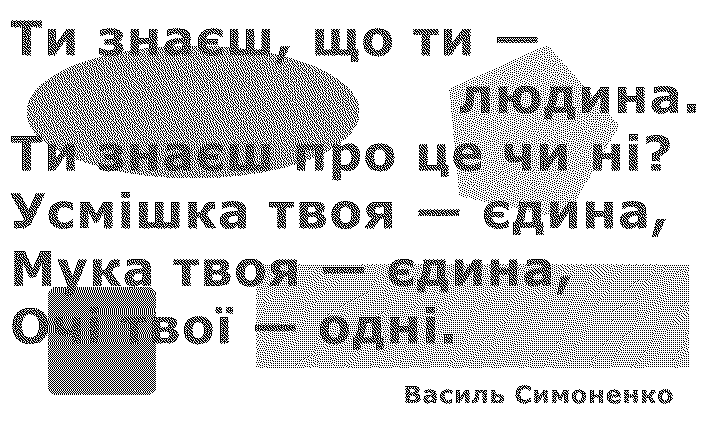

Василь Симоненко



In [ ]:
binary = img.convert('1')
display(binary)
print(pytesseract.image_to_string(binary,lang='ukr', config='--tessdata-dir .'))

Trying with threshold 0


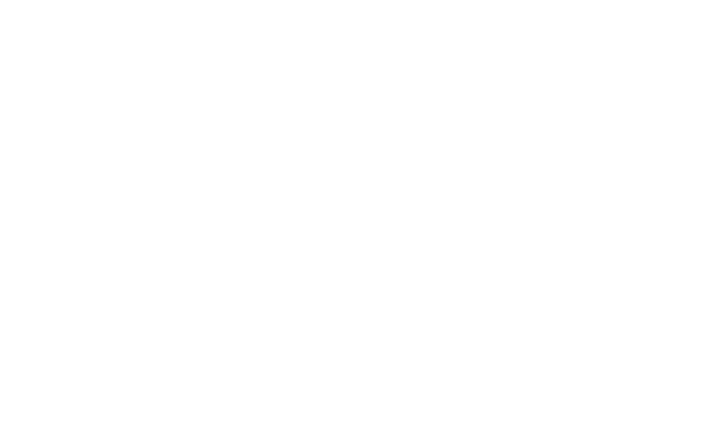


Trying with threshold 32


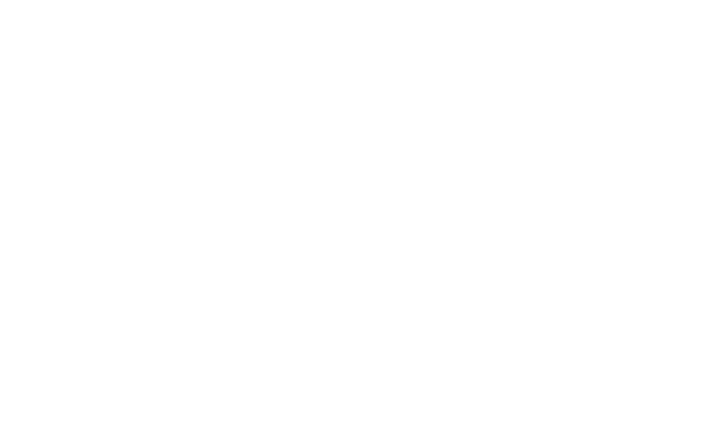


Trying with threshold 64


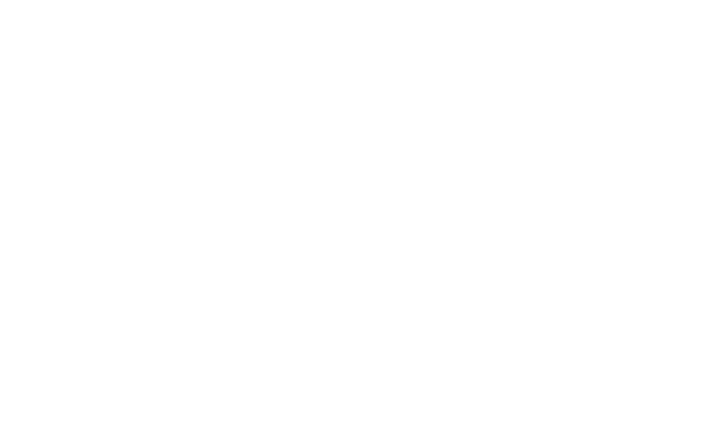


Trying with threshold 96


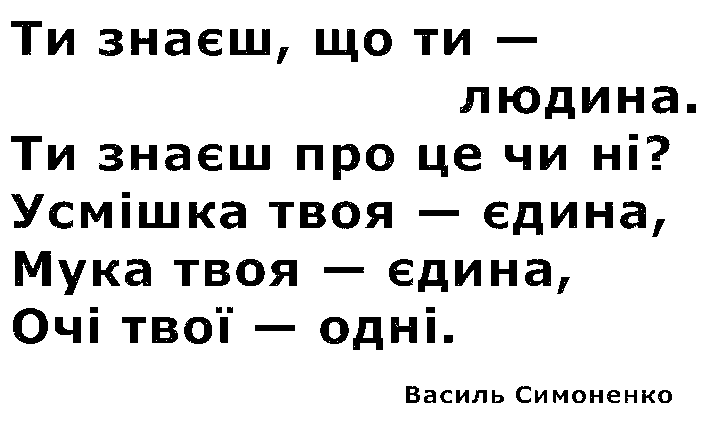

Ти знаєш, що ти -
людина.
Ти знаєш про це чи ні?
Усмішка твоя -- єдина,
Мука твоя - єдина,
Очі твої -- одні.
Василь Симоненко

Trying with threshold 128


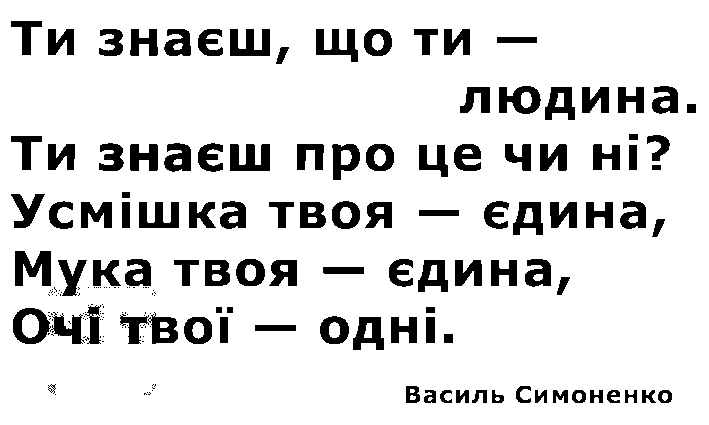

Ти знаєш, що ти -
людина.
Ти знаєш про це чи ні?
Усмішка твоя -- єдина,
Мука твоя -- єдина,
Очі твої -- одні.
м Василь Симоненко

Trying with threshold 160


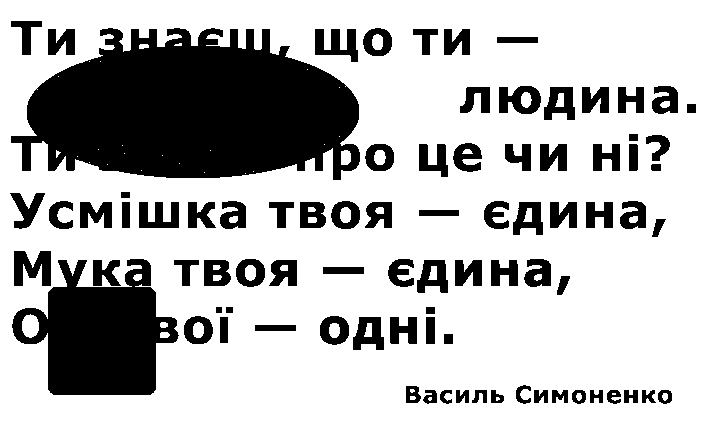

Ти що ти -
людина.
о це чи ні?
Усмішка твоя -- єдина,
Мука твоя -- єдина,
ої -- одні.
Василь Симоненко

Trying with threshold 192


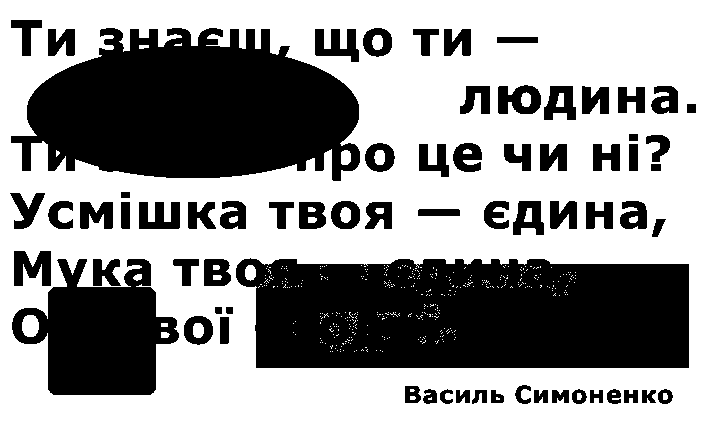

Ти що ти -
людина.
о це чи ні?
Усмішка твоя - єдина,
Мука тв
іо.'.
Василь Симоненко

Trying with threshold 224


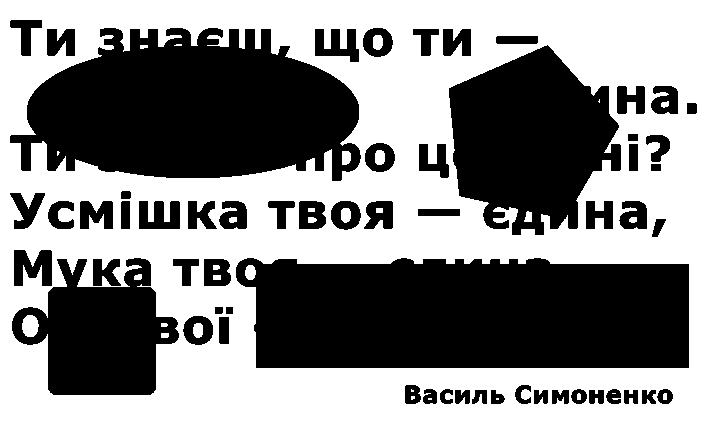

Ти
Усмпшка твоя інши
іКі ТВ
Василь Симоненко

Trying with threshold 256


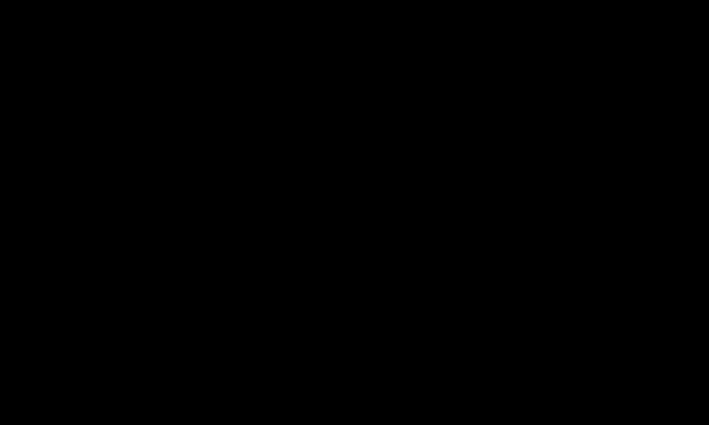

In [ ]:
for thresh in range(0,257,32):
    print("Trying with threshold " + str(thresh))
    # Lets display the binarized image inline
    display(binarize(Image.open('images/Symonenko_noisy.jpg'), thresh))
    text = pytesseract.image_to_string(binarize(Image.open('images/Symonenko_noisy.jpg'), thresh),
                                      lang='ukr', config='--tessdata-dir .')

    print(text.replace('\n\n','\n'))
